In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import datetime

## stat imports
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

#import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#reset pd.reset_option('display.float_format')

from numpy import linalg as LA

from IPython.display import clear_output



## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Others
import nltk
import string
import re
from collections import Counter
from matplotlib import pyplot

from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import models

from nltk.stem import SnowballStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.manifold import TSNE

import csv

from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
from gensim.models.word2vec import Text8Corpus


from collections import defaultdict



from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import os


#critical function spacing print
def v():
  print("\n")
  return None



from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


v()
print("[[IMPORT OK]]")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aryavish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



[[IMPORT OK]]


In [20]:
xtrain = pd.read_csv("xtrain_exp.csv")
xtest = pd.read_csv("xtest_exp.csv")


In [21]:
xtrain # contains target and cleaned up tweet, needs to be tokenized

,target,clean_tweet
0,1,danieloh lookin forward hear remix track sosweet
1,0,scari dream
2,0,maggiesnail quit amaz ! wish could seen well !...
3,0,sunsetjello sunset realli angri right give awa...
4,1,clean room
...,...,...
79995,0,ugh realli realli realli dread work today case...
79996,1,unveil footsi latest team jersey follow cake c...
79997,1,divasoria let set up ! jill thesi mad lang let...
79998,0,mann stori takin like it ! ! ! ! !


In [22]:
xtest

,target,clean_tweet
0,1,danni need help research time pleas answer onl...
1,1,yes sun arriv here still seem mediterranean
2,0,dhabz awww thank dana ! realli wish could spen...
3,1,jayc1980 hope someon extra tix give you i will...
4,1,singpolymatest yep twitter user thank
...,...,...
19995,0,lilsqueaky68 well pipe dream die everyon got m...
19996,0,finish extrem loud incred close lay down would...
19997,0,got readi leav back pari coupl hour !
19998,1,hahah eminem hilari


In [23]:
combined = pd.concat([xtrain,xtest])

combined.reset_index(level=0, inplace=True)

combined = combined.drop(columns="index")

In [24]:
combined

,target,clean_tweet
0,1,danieloh lookin forward hear remix track sosweet
1,0,scari dream
2,0,maggiesnail quit amaz ! wish could seen well !...
3,0,sunsetjello sunset realli angri right give awa...
4,1,clean room
...,...,...
99995,0,lilsqueaky68 well pipe dream die everyon got m...
99996,0,finish extrem loud incred close lay down would...
99997,0,got readi leav back pari coupl hour !
99998,1,hahah eminem hilari


In [25]:
combined.dropna(inplace=True)

combined.isnull().sum()

target         0
clean_tweet    0
dtype: int64

In [26]:
# tokenize and prep for svm

combined['token']= [word_tokenize(entry) for entry in combined['clean_tweet']]

In [30]:
combined['len_token'] = combined.token.apply(lambda x: len(x))

count   99952.00000
mean        9.00391
std         4.89391
min         1.00000
25%         5.00000
50%         8.00000
75%        12.00000
max        79.00000
Name: len_token, dtype: float64

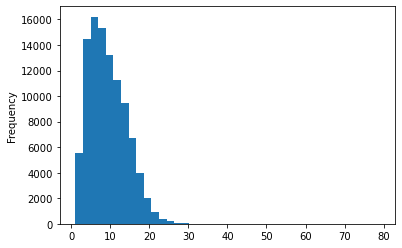

In [131]:
combined.len_token.describe()

combined.len_token.plot.hist(bins=40) #keep 15 token length padding

In [31]:
combined.reset_index(level=0, inplace=True)
combined = combined.drop(columns="index")

In [32]:
combined

,target,clean_tweet,token,len_token
0,1,danieloh lookin forward hear remix track sosweet,"[danieloh, lookin, forward, hear, remix, track...",7
1,0,scari dream,"[scari, dream]",2
2,0,maggiesnail quit amaz ! wish could seen well !...,"[maggiesnail, quit, amaz, !, wish, could, seen...",12
3,0,sunsetjello sunset realli angri right give awa...,"[sunsetjello, sunset, realli, angri, right, gi...",8
4,1,clean room,"[clean, room]",2
...,...,...,...,...
99971,0,lilsqueaky68 well pipe dream die everyon got m...,"[lilsqueaky68, well, pipe, dream, die, everyon...",17
99972,0,finish extrem loud incred close lay down would...,"[finish, extrem, loud, incred, close, lay, dow...",15
99973,0,got readi leav back pari coupl hour !,"[got, readi, leav, back, pari, coupl, hour, !]",8
99974,1,hahah eminem hilari,"[hahah, eminem, hilari]",3


WORD2VEC SVM
===========


In [33]:
max_len = 15
embed_dim = 100

wv = Word2Vec(combined.token, size=embed_dim, window=5, min_count=5, workers=3)

In [34]:
len(wv.wv.vocab) # number of embedded words

9219

In [35]:
w2v = dict(zip(wv.wv.index2word, wv.wv.syn0)) #dictionary word --> vec embedding

<ipython-input-35-a469e939f819>:1: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).



In [36]:
## ebedding matrix on combined



embed = np.zeros([combined.shape[0],max_len,embed_dim])

embed.shape

(99976, 15, 100)

In [37]:
# vectorize each tokenized tweet

for i in range(combined.shape[0]):
    vtok = combined.loc[i,'token']

    for x in range(min(max_len,len(vtok))):
        getvec = w2v.get(vtok[x])
        if getvec is not None:
            embed[i][x] = getvec




In [39]:
svm_data = np.mean(embed, axis=1) # compute mean of dimension vector (100)

svm_data.shape # tweets x word2vector dim 100

svm_data[0]

(99976, 100)

array([ 8.02811946e-02,  1.06927429e-01,  1.12149157e-02, -6.99406291e-03,
        1.78775207e-01,  1.65115975e-01, -4.16652263e-02, -4.24205671e-02,
       -3.51145233e-02,  3.09042028e-02, -1.07708710e-01,  3.14648154e-02,
       -1.43023984e-04,  5.11144491e-02, -1.96333645e-01,  1.11498706e-02,
        1.02762612e-01,  4.32362159e-03,  9.46592577e-03,  3.78408572e-03,
        1.23278637e-01, -2.35573029e-02,  1.46593468e-01, -7.57407176e-02,
        3.94903024e-03,  4.47569057e-02,  8.64913886e-02, -9.54038650e-04,
       -1.88113443e-01, -4.17589560e-02,  5.46362499e-02,  1.93213390e-01,
       -1.74578816e-02, -6.24268976e-02, -1.52247579e-02, -1.40806130e-01,
        6.38798475e-02, -7.70646304e-02,  6.04791433e-02,  6.90051738e-02,
        1.26606392e-01, -6.52866709e-02, -7.06178778e-02, -1.66471637e-01,
       -3.79425678e-02, -6.83089097e-04,  1.85769476e-01, -1.11952884e-01,
        3.69844158e-02,  7.33315318e-02, -1.57621157e-01, -8.77641102e-02,
       -1.24503086e-01, -

In [40]:
Train_X, Test_X, Train_Y, Test_Y = \
model_selection.train_test_split(svm_data,combined['target'],test_size=0.2)

In [41]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
SVM.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVC(gamma='auto')

SVM Accuracy Score ->  70.91918383676735
